# Research Question 1: River extent of influence

What is the spatial extent of influence of the river contribution to surface waters in the CAA?
- Does the RCD span full straits in the CAA? If so, which and during all seasons or only for a portion of the year?
- How long does it take for river contributions in the central CAA to reach Baffin Bay?

If proportion of Mn concentration at the particular point in space that is due to the contribution from rivers is greater than x, then the point is defined as in the river domain. Check on 5-day output time scale and on monthly average timescales.

In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Load domain dimensions for reference:

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask = tmask[0,:,1480:2050,160:800]

In [5]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

In [6]:
tmask_full = np.empty((12,50,570,640))
tmask_full[:] = tmask

In [7]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])#[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])#[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

##### Load Mn model run results:

In [8]:
folder  = '/data/brogalla/run_storage/riv-2a/'
folder1 = '/data/brogalla/run_storage/riv-2b/'
folder2 = '/data/brogalla/run_storage/reference/'
file14  = 'ANHA12_EXH006_2015_monthly.nc'
file15  = 'ANHA12_EXH006_2016_monthly.nc'
file16  = 'ANHA12_EXH006_2017_monthly.nc'
file17  = 'ANHA12_EXH006_2018_monthly.nc'

In [9]:
cont_monthly14 = nc.Dataset(folder1+file14)
cont_monthly15 = nc.Dataset(folder1+file15)
cont_monthly16 = nc.Dataset(folder1+file16)
cont_monthly17 = nc.Dataset(folder1+file17)

glac_monthly14 = nc.Dataset(folder+file14)
glac_monthly15 = nc.Dataset(folder+file15)
glac_monthly16 = nc.Dataset(folder+file16)
glac_monthly17 = nc.Dataset(folder+file17)

base_monthly14 = nc.Dataset(folder2+file14)
base_monthly15 = nc.Dataset(folder2+file15)
base_monthly16 = nc.Dataset(folder2+file16)
base_monthly17 = nc.Dataset(folder2+file17)

In [10]:
dmn_cont_2015 = np.array(cont_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2016 = np.array(cont_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2017 = np.array(cont_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2018 = np.array(cont_monthly17.variables['dissolmn'])[:,0,:,:,:]

dmn_glac_2015 = np.array(glac_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2016 = np.array(glac_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2017 = np.array(glac_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2018 = np.array(glac_monthly17.variables['dissolmn'])[:,0,:,:,:]

dmn_base_2015 = np.array(base_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2016 = np.array(base_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2017 = np.array(base_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2018 = np.array(base_monthly17.variables['dissolmn'])[:,0,:,:,:]

Calculate the proportional contribution of glacial rivers to each grid cell:

$$ prop = \frac{Mn_{glacier}-Mn_{base}}{Mn_{base}} = \frac{Mn_{glacier}}{Mn_{base}} - 1 $$

In [11]:
def calculate_prop(dmn_riv_off, dmn_riv_on):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [12]:
glacier_prop_2015   = calculate_prop(dmn_base_2015, dmn_glac_2015)
glacier_prop_2016   = calculate_prop(dmn_base_2016, dmn_glac_2016)
glacier_prop_2017   = calculate_prop(dmn_base_2017, dmn_glac_2017)
glacier_prop_2018   = calculate_prop(dmn_base_2018, dmn_glac_2018)

cont_prop_2015   = calculate_prop(dmn_base_2015, dmn_cont_2015)
cont_prop_2016   = calculate_prop(dmn_base_2016, dmn_cont_2016)
cont_prop_2017   = calculate_prop(dmn_base_2017, dmn_cont_2017)
cont_prop_2018   = calculate_prop(dmn_base_2018, dmn_cont_2018)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


# Volume fluxes

In [13]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    folder = '/ocean/brogalla/GEOTRACES/time-series/'
    
    # Load calculated time series of fluxes:
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2a'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder+'time-series-20190930-riv-2b'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
                pickle.load(open(folder+'time-series-20190930-ref'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_V1, time_series_V2, time_series_V_WCAA, time_series_V7, time_series_V8, \
            time_series_V9, time_series_V10, time_series_V11

In [14]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1E = np.sort(os.listdir('/data/brogalla/run_storage/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [15]:
ts_2015_V1, ts_2015_V2, ts_2015_V_WCAA, ts_2015_V7, ts_2015_V8, ts_2015_V9, ts_2015_V10, ts_2015_V11 = time_series_pickle(2015)

In [16]:
dates_2015 = file_dates(2015)

- V8  --- Baffin Bay
- V10 --- Nares Strait
- V11 --- Parry Channel

In [17]:
V08_2015 = np.empty((12, 50, 167))
V10_2015 = np.empty((12, 50, 59))
V11_2015 = np.empty((12, 50, 52))

for months in np.arange(1, 13):
    Volume08_2015 = np.zeros((50,167))
    Volume10_2015 = np.zeros((50,59))
    Volume11_2015 = np.zeros((50,52))
    n = 0
    for i in range(0,len(dates_2015)):
        if dates_2015[i].month == months:
            Volume08_2015 = Volume08_2015 + ts_2015_V8[i,:,:]
            Volume10_2015 = Volume10_2015 + ts_2015_V10[i,:,:]
            Volume11_2015 = Volume11_2015 + ts_2015_V11[i,:,:]
            n+=1
            
    V08_2015[months-1] = Volume08_2015/(10000*n)            
    V10_2015[months-1] = Volume10_2015/(10000*n)
    V11_2015[months-1] = Volume11_2015/(10000*n)

# Cross-sectional plot of riverine dMn

Load boundary coordinates:

In [18]:
imin, imax = 1480, 2050
jmin, jmax = 160, 800

In [19]:
l1i = 2013-imin; l1j = np.arange(300-jmin,392-jmin)
l2i = 1935-imin; l2j = np.arange(450-jmin,530-jmin)
l3i = np.arange(1850-imin,1885-imin); l3j = 555-jmin
l4i = np.arange(1753-imin,1837-imin); l4j = 568-jmin
l5i = np.arange(1720-imin,1790-imin); l5j = 605-jmin
l6i = 1730-imin; l6j = np.arange(660-jmin,690-jmin)

t1i = np.arange(1635-imin,1653-imin); t1j = 760-jmin

r1i = 1520-imin; r1j = np.arange(505-jmin,673-jmin)
r2i = 1520-imin; r2j = np.arange(385-jmin,405-jmin)

N1i = np.arange(1570-imin,1630-imin); N1j = 635-jmin #Nares
P1i = 1585-imin; P1j = np.arange(485-jmin,538-jmin)  #Parry channel

In [22]:
print('Anywhere max:    ', np.nanmax(glacier_prop_2015[:,:,:,:]))
print('Anywhere min:    ', np.nanmin(glacier_prop_2015[:,:,:,:]))
print('Anywhere ave:    ', np.nanmean(glacier_prop_2015[:,:,:,:]))

Anywhere max:     0.48654893
Anywhere min:     -0.03764471
Anywhere ave:     0.00445993


In [23]:
print('Max in Polar Mixed Layer: ')
print('BB:    ', np.nanmax(glacier_prop_2015[:,0:10,r1i,r1j]))
print('Nares: ', np.nanmax(glacier_prop_2015[:,0:10,N1i,N1j]))
print('Parry: ', np.nanmax(glacier_prop_2015[:,0:10,P1i,P1j]))

Max in Polar Mixed Layer: 
BB:     0.43477488
Nares:  0.24531972
Parry:  0.08180078


In [24]:
print('Mean in Polar Mixed Layer: ')
print('BB:    ', np.nanmean(glacier_prop_2015[:,0:10,r1i,r1j]))
print('Nares: ', np.nanmean(glacier_prop_2015[:,0:10,N1i,N1j]))
print('Parry: ', np.nanmean(glacier_prop_2015[:,0:10,P1i,P1j]))

Mean in Polar Mixed Layer: 
BB:     0.037328787
Nares:  0.057814315
Parry:  0.01817097


In [25]:
print('Max of all depths: ')
print('BB:    ', np.nanmax(glacier_prop_2015[:,:,r1i,r1j]))
print('Nares: ', np.nanmax(glacier_prop_2015[:,:,N1i,N1j]))
print('Parry: ', np.nanmax(glacier_prop_2015[:,:,P1i,P1j]))

Max of all depths: 
BB:     0.43477488
Nares:  0.24649982
Parry:  0.08180078


In [26]:
print('Mean of all depths: ')
print('BB:    ', np.nanmean(glacier_prop_2015[:,:,r1i,r1j]))
print('Nares: ', np.nanmean(glacier_prop_2015[:,:,N1i,N1j]))
print('Parry: ', np.nanmean(glacier_prop_2015[:,:,P1i,P1j]))

Mean of all depths: 
BB:     0.022094926
Nares:  0.046236057
Parry:  0.017782854


Baffin Bay:

Text(0.5, 0.98, 'Baffin Bay cross sections: glacial')

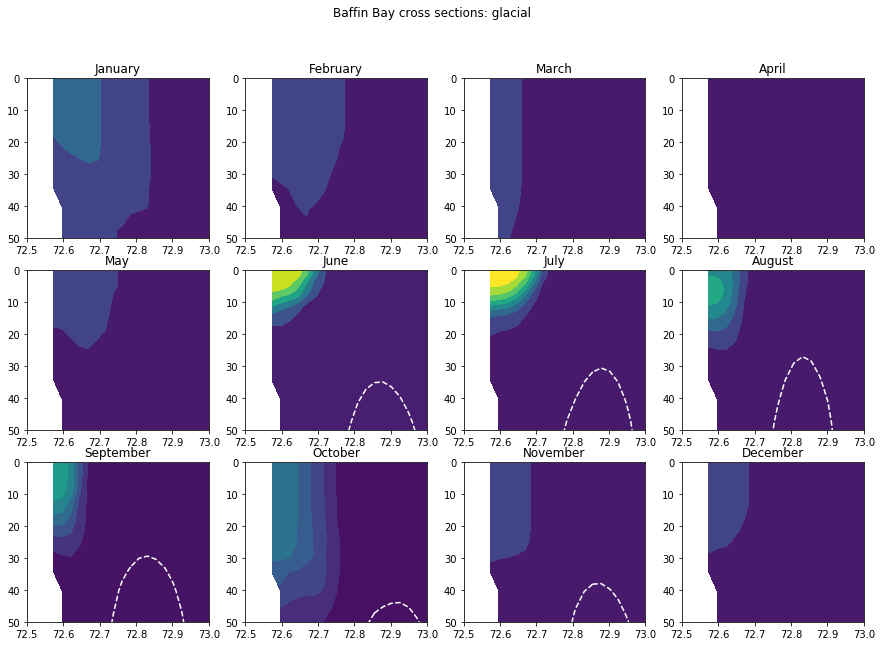

In [25]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([50, 0])
        axes.set_xlim([72.5, 73])
    
levels=[-0.5, 0.5]
# levels=[-0.05, 0.05]
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[0,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[0,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[1,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[0,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[2,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[0,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[3,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
C1 = ax[0,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[0,:,:], levels, colors='w')
C2 = ax[0,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[1,:,:], levels, colors='w')
C3 = ax[0,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[2,:,:], levels, colors='w')
C4 = ax[0,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[3,:,:], levels, colors='w')
# ax[0,0].clabel(C1, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,1].clabel(C2, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,2].clabel(C3, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,3].clabel(C4, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[4,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[1,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[5,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[1,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[6,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[1,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[7,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
C5 = ax[1,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[4,:,:], levels, colors='w')
C6 = ax[1,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[5,:,:], levels, colors='w')
C7 = ax[1,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[6,:,:], levels, colors='w')
C8 = ax[1,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[7,:,:], levels, colors='w')
# ax[1,0].clabel(C5, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,1].clabel(C6, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,2].clabel(C7, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,3].clabel(C8, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[8,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[2,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[9,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[2,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[10,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
ax[2,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[11,:,r1i,r1j]), 10, vmin=0, vmax=0.30)
C9  = ax[2,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[8,:,:], levels, colors='w')
C10 = ax[2,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[9,:,:], levels, colors='w')
C11 = ax[2,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[10,:,:], levels, colors='w')
C12 = ax[2,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[11,:,:], levels, colors='w')
# ax[2,0].clabel(C9, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,1].clabel(C10, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,2].clabel(C11, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,3].clabel(C12, levels, inline=1, fontsize=10, fmt='%1.1f')

fig.suptitle('Baffin Bay cross sections: glacial')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

Text(0.5, 0.98, 'Baffin Bay cross sections: glacial')

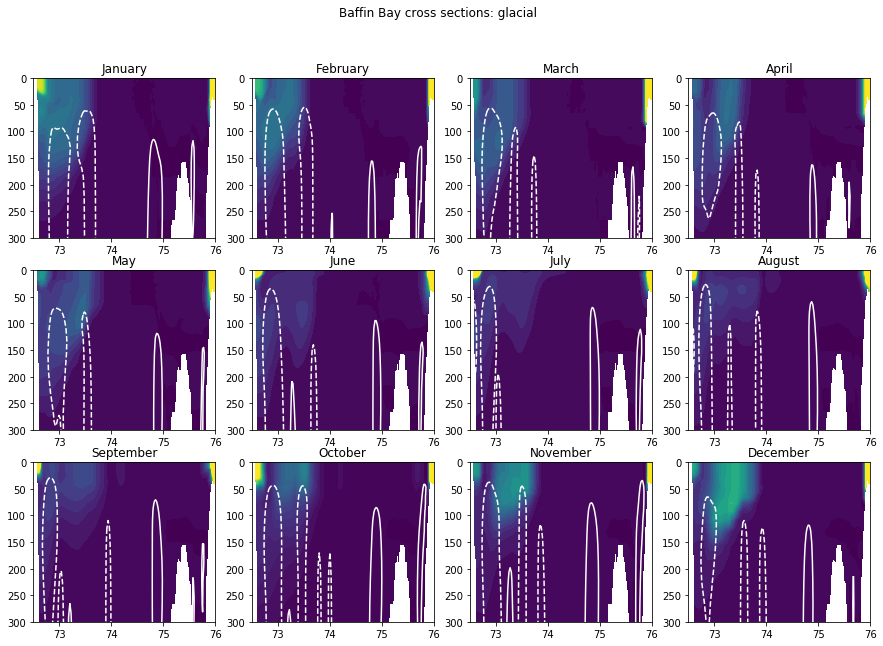

In [26]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([300, 0])
        axes.set_xlim([72.5, 76])
    
levels=[-0.5, 0.5]
# levels=[-0.05, 0.05]
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[0,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[0,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[1,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[0,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[2,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[0,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[3,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
C1 = ax[0,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[0,:,:], levels, colors='w')
C2 = ax[0,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[1,:,:], levels, colors='w')
C3 = ax[0,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[2,:,:], levels, colors='w')
C4 = ax[0,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[3,:,:], levels, colors='w')
# ax[0,0].clabel(C1, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,1].clabel(C2, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,2].clabel(C3, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,3].clabel(C4, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[4,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[1,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[5,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[1,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[6,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[1,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[7,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
C5 = ax[1,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[4,:,:], levels, colors='w')
C6 = ax[1,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[5,:,:], levels, colors='w')
C7 = ax[1,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[6,:,:], levels, colors='w')
C8 = ax[1,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[7,:,:], levels, colors='w')
# ax[1,0].clabel(C5, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,1].clabel(C6, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,2].clabel(C7, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,3].clabel(C8, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[8,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[2,1].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[9,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[2,2].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[10,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
ax[2,3].contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[11,:,r1i,r1j]), 100, vmin=0, vmax=0.10)
C9  = ax[2,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[8,:,:], levels, colors='w')
C10 = ax[2,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[9,:,:], levels, colors='w')
C11 = ax[2,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[10,:,:], levels, colors='w')
C12 = ax[2,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[11,:,:], levels, colors='w')
# ax[2,0].clabel(C9, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,1].clabel(C10, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,2].clabel(C11, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,3].clabel(C12, levels, inline=1, fontsize=10, fmt='%1.1f')

fig.suptitle('Baffin Bay cross sections: glacial')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

Text(0.5, 0.98, 'Baffin Bay cross sections: continental')

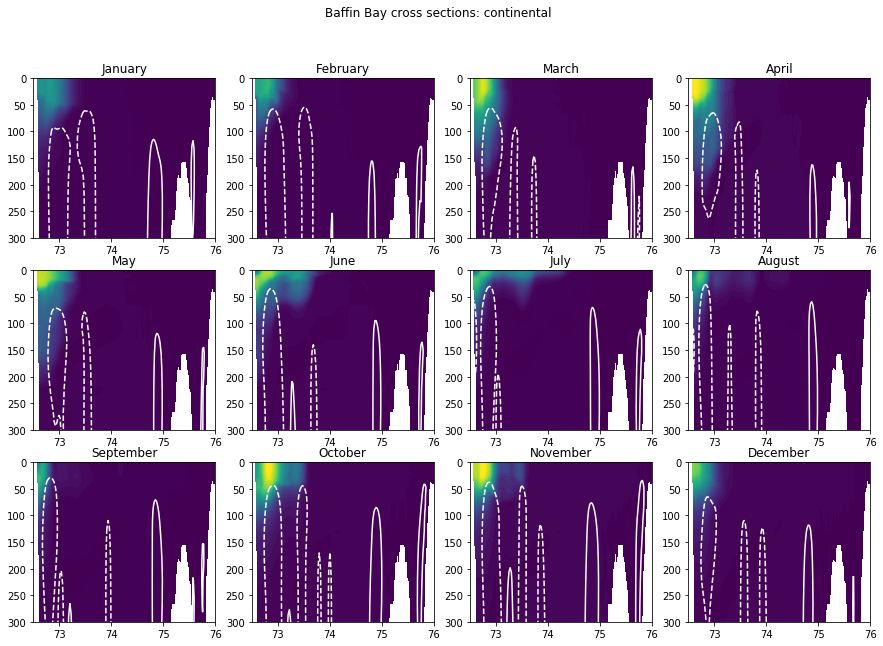

In [27]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([300, 0])
        axes.set_xlim([72.5, 76])
    
levels=[-0.5, 0.5]
# levels=[-0.02, 0.02]
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[0,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[0,1].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[1,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[0,2].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[2,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[0,3].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[3,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
C1 = ax[0,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[0,:,:], levels, colors='w')
C2 = ax[0,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[1,:,:], levels, colors='w')
C3 = ax[0,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[2,:,:], levels, colors='w')
C4 = ax[0,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[3,:,:], levels, colors='w')
# ax[0,0].clabel(C1, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,1].clabel(C2, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,2].clabel(C3, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,3].clabel(C4, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[4,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[1,1].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[5,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[1,2].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[6,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[1,3].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[7,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
C5 = ax[1,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[4,:,:], levels, colors='w')
C6 = ax[1,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[5,:,:], levels, colors='w')
C7 = ax[1,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[6,:,:], levels, colors='w')
C8 = ax[1,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[7,:,:], levels, colors='w')
# ax[1,0].clabel(C5, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,1].clabel(C6, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,2].clabel(C7, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,3].clabel(C8, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[8,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[2,1].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[9,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[2,2].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[10,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
ax[2,3].contourf(tlats[r1i,r1j], depth, np.transpose(cont_prop_2015[11,:,r1i,r1j]), 50, vmin=0, vmax=0.02)
C9  = ax[2,0].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[8,:,:], levels, colors='w')
C10 = ax[2,1].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[9,:,:], levels, colors='w')
C11 = ax[2,2].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[10,:,:], levels, colors='w')
C12 = ax[2,3].contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[11,:,:], levels, colors='w')
# ax[2,0].clabel(C9, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,1].clabel(C10, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,2].clabel(C11, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,3].clabel(C12, levels, inline=1, fontsize=10, fmt='%1.1f')

fig.suptitle('Baffin Bay cross sections: continental')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

Parry Channel

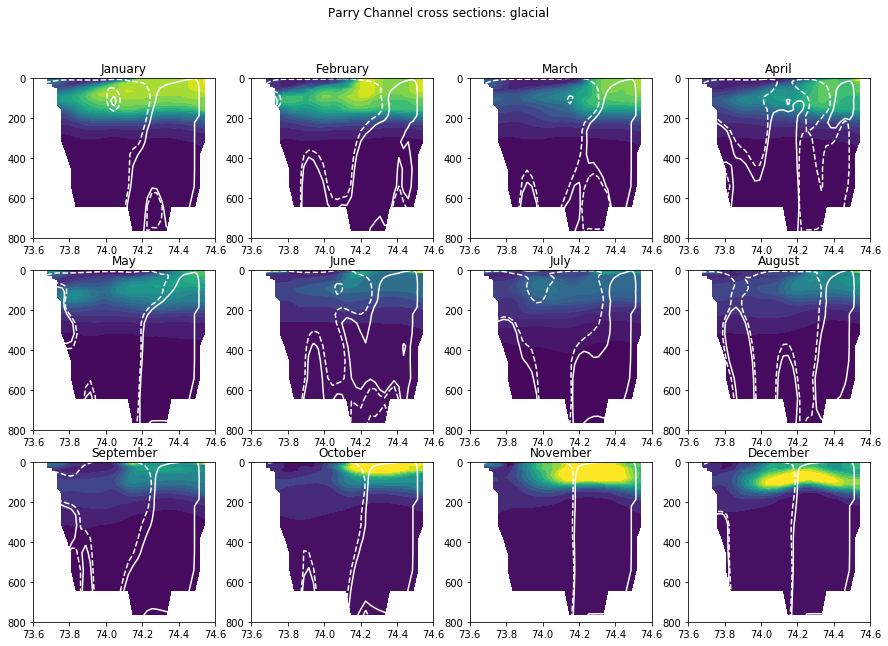

In [28]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([800, 0])
        axes.set_xlim([73.6, 74.6])
    
# levels=[-0.5, -0.25, 0.25, 0.5]
levels=[-0.05, 0.05]
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[0,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[0,1].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[1,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[0,2].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[2,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[0,3].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[3,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
C1 = ax[0,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[0,:,:], levels, colors='w')
C2 = ax[0,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[1,:,:], levels, colors='w')
C3 = ax[0,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[2,:,:], levels, colors='w')
C4 = ax[0,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[3,:,:], levels, colors='w')
# ax[0,0].clabel(C1, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,1].clabel(C2, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,2].clabel(C3, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,3].clabel(C4, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[4,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[1,1].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[5,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[1,2].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[6,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[1,3].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[7,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
C5 = ax[1,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[4,:,:], levels, colors='w')
C6 = ax[1,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[5,:,:], levels, colors='w')
C7 = ax[1,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[6,:,:], levels, colors='w')
C8 = ax[1,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[7,:,:], levels, colors='w')
# ax[1,0].clabel(C5, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,1].clabel(C6, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,2].clabel(C7, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,3].clabel(C8, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[8,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[2,1].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[9,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[2,2].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[10,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
ax[2,3].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[11,:,P1i,P1j]), 16, vmin=0, vmax=0.05)
C9  = ax[2,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[8,:,:], levels, colors='w')
C10 = ax[2,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[9,:,:], levels, colors='w')
C11 = ax[2,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[10,:,:], levels, colors='w')
C12 = ax[2,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[11,:,:], levels, colors='w')
# ax[2,0].clabel(C9, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,1].clabel(C10, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,2].clabel(C11, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,3].clabel(C12, levels, inline=1, fontsize=10, fmt='%1.1f')

fig.suptitle('Parry Channel cross sections: glacial')
fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

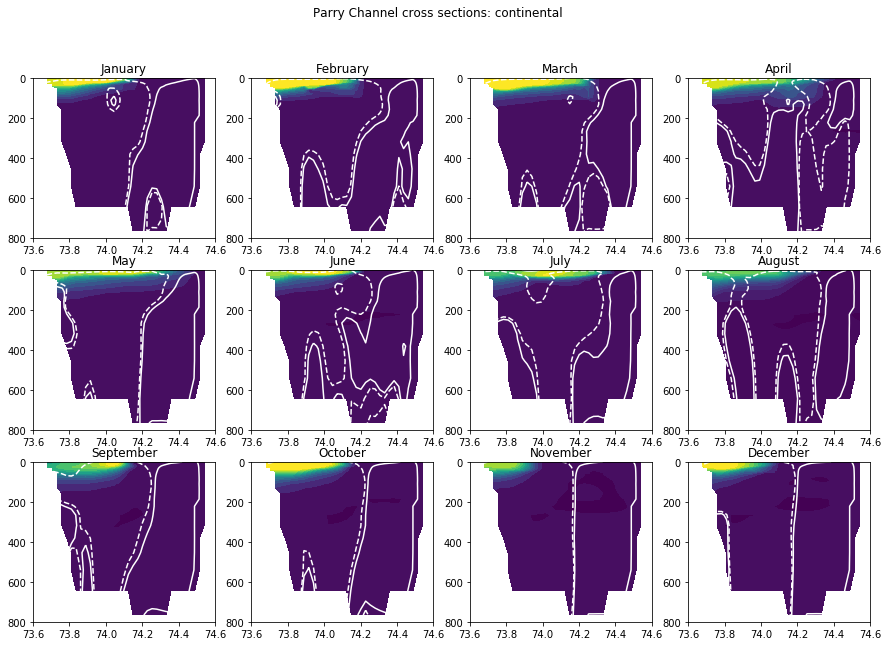

In [198]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([800, 0])
        axes.set_xlim([73.6, 74.6])
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[0,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[0,1].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[1,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[0,2].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[2,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[0,3].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[3,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
C1 = ax[0,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[0,:,:], levels, colors='w')
C2 = ax[0,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[1,:,:], levels, colors='w')
C3 = ax[0,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[2,:,:], levels, colors='w')
C4 = ax[0,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[3,:,:], levels, colors='w')
# ax[0,0].clabel(C1, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,1].clabel(C2, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,2].clabel(C3, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[0,3].clabel(C4, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[4,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[1,1].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[5,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[1,2].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[6,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[1,3].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[7,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
C5 = ax[1,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[4,:,:], levels, colors='w')
C6 = ax[1,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[5,:,:], levels, colors='w')
C7 = ax[1,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[6,:,:], levels, colors='w')
C8 = ax[1,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[7,:,:], levels, colors='w')
# ax[1,0].clabel(C5, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,1].clabel(C6, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,2].clabel(C7, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[1,3].clabel(C8, levels, inline=1, fontsize=10, fmt='%1.1f')

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[8,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[2,1].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[9,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[2,2].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[10,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
ax[2,3].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[11,:,P1i,P1j]), 16, vmin=0, vmax=0.02)
C9  = ax[2,0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[8,:,:], levels, colors='w')
C10 = ax[2,1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[9,:,:], levels, colors='w')
C11 = ax[2,2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[10,:,:], levels, colors='w')
C12 = ax[2,3].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[11,:,:], levels, colors='w')
# ax[2,0].clabel(C9, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,1].clabel(C10, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,2].clabel(C11, levels, inline=1, fontsize=10, fmt='%1.1f')
# ax[2,3].clabel(C12, levels, inline=1, fontsize=10, fmt='%1.1f')

fig.suptitle('Parry Channel cross sections: continental')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-cn.png', bbox_inches='tight', dpi=300)

Nares Strait:

Text(0.5, 0.98, 'Nares Strait cross sections: glacial')

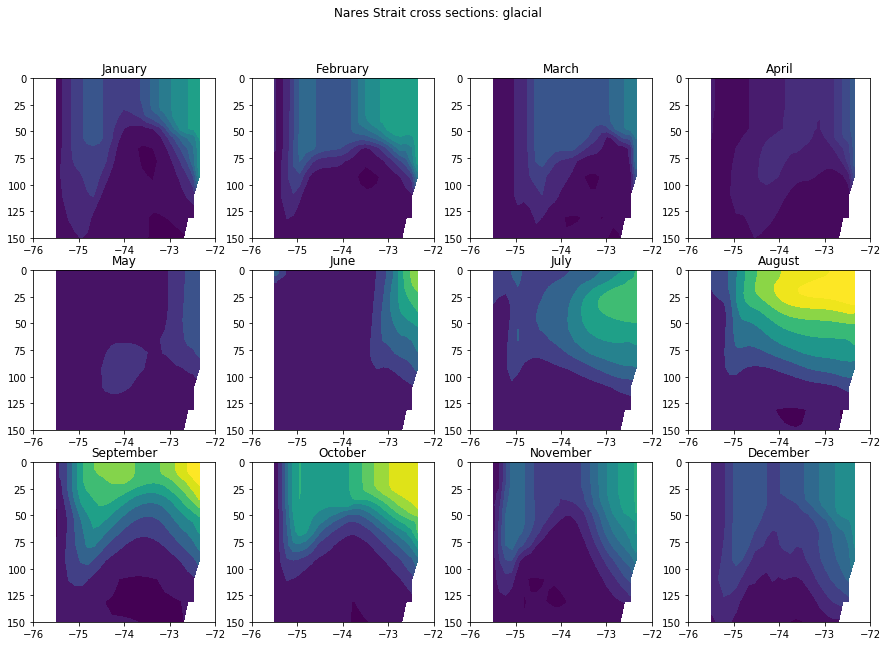

In [39]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([150, 0])
        axes.set_xlim([-76, -72])
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[0,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[0,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[1,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[0,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[2,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[0,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[3,:,N1i,N1j]), 10, vmin=0, vmax=0.2)

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[4,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[1,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[5,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[1,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[6,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[1,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[7,:,N1i,N1j]), 10, vmin=0, vmax=0.2)

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[8,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[2,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[9,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[2,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[10,:,N1i,N1j]), 10, vmin=0, vmax=0.2)
ax[2,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[11,:,N1i,N1j]), 10, vmin=0, vmax=0.2)

fig.suptitle('Nares Strait cross sections: glacial')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-Nares-gc.png', bbox_inches='tight', dpi=300)

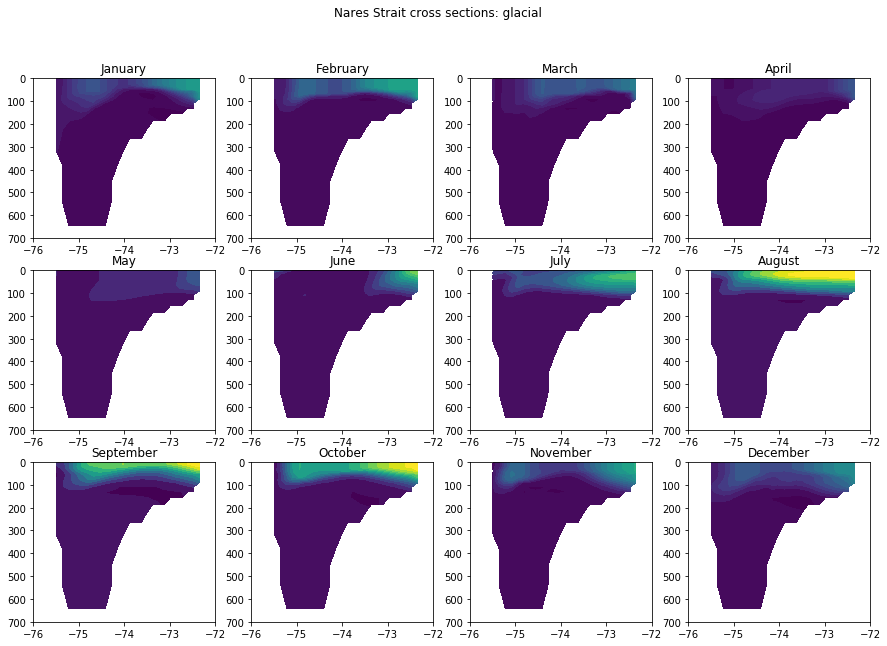

In [199]:
fig, ax = plt.subplots(3,4,figsize=(15,10))

for i in [0, 1, 2]:
    for axes in ax[i]:
        axes.invert_yaxis()
        axes.set_ylim([700, 0])
        axes.set_xlim([-76, -72])
    
ax[0,0].set_title('January')
ax[0,1].set_title('February')
ax[0,2].set_title('March')
ax[0,3].set_title('April')
ax[0,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[0,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[0,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[1,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[0,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[2,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[0,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[3,:,N1i,N1j]), 16, vmin=0, vmax=0.2)

ax[1,0].set_title('May')
ax[1,1].set_title('June')
ax[1,2].set_title('July')
ax[1,3].set_title('August')
ax[1,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[4,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[1,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[5,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[1,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[6,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[1,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[7,:,N1i,N1j]), 16, vmin=0, vmax=0.2)

ax[2,0].set_title('September')
ax[2,1].set_title('October')
ax[2,2].set_title('November')
ax[2,3].set_title('December')
ax[2,0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[8,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[2,1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[9,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[2,2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[10,:,N1i,N1j]), 16, vmin=0, vmax=0.2)
ax[2,3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[11,:,N1i,N1j]), 16, vmin=0, vmax=0.2)

fig.suptitle('Nares Strait cross sections: glacial')
# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-Nares-gc.png', bbox_inches='tight', dpi=300)

# Cross-section final figures:

Baffin Bay and Nares Strait
- cross section BB July
- cross section Nares strait
- cross section PC extension to southern side of channel 
- cross section PC continental vs. glacial extent

#### cross section BB July

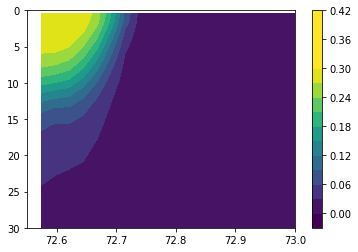

In [25]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.invert_yaxis()
ax.set_ylim([30, 0])
ax.set_xlim([72.55, 73])
    
levels=[-0.5, 0.5]
    
CS = ax.contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[6,:,r1i,r1j]), 15, vmin=0, vmax=0.30)
ax.contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[6,:,:], levels, colors='w')

cb = fig.colorbar(CS)
cb.set_clim(0, 0.30)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

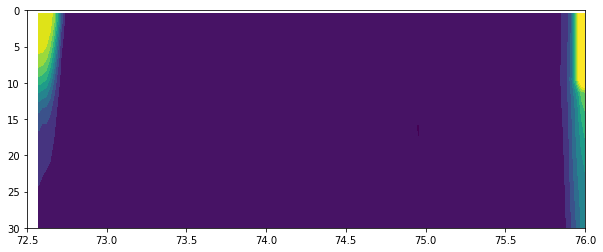

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.invert_yaxis()
ax.set_ylim([30, 0])
ax.set_xlim([72.5, 76])
    
levels=[-0.5,-0.25,-0.1, 0.1, 0.25, 0.5]
    
ax.contourf(tlats[r1i,r1j], depth, np.transpose(glacier_prop_2015[6,:,r1i,r1j]), 15, vmin=0, vmax=0.30)
# ax.contour(tlats[r1i,r1j[0:-1]], depth, V08_2015[6,:,:], levels, colors='w')

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/XS-parry-gc.png', bbox_inches='tight', dpi=300)

#### cross section Nares strait

In [27]:
glacier_prop_2015.shape

(12, 50, 570, 640)

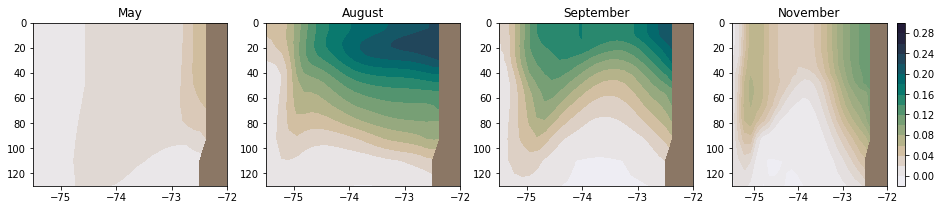

In [108]:
fig, ax = plt.subplots(1,4,figsize=(16,3))

for axes in ax:
    axes.invert_yaxis()
    axes.set_ylim([130, 0])
    axes.set_xlim([-75.5, -72])
    axes.contourf(lon[1481+N1i,160+N1j], depth, land_mask[:,1479+N1i,159+N1j], \
                   vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)    


ax[0].set_title('May')
ax[1].set_title('August')
ax[2].set_title('September')
ax[3].set_title('November')
ax[0].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[4,:,N1i,N1j]), 16, vmin=0, vmax=0.28, cmap=cmocean.cm.rain)
CS=ax[1].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[7,:,N1i,N1j]), 16, vmin=0, vmax=0.28, cmap=cmocean.cm.rain)
ax[2].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[8,:,N1i,N1j]), 16, vmin=0, vmax=0.28, cmap=cmocean.cm.rain)
ax[3].contourf(tlons[N1i,N1j], depth, np.transpose(glacier_prop_2015[10,:,N1i,N1j]), 16, vmin=0, vmax=0.28, cmap=cmocean.cm.rain)

cb = fig.colorbar(CS)
cb.set_clim(0, 0.28)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-XS-Nares-gc.png', bbox_inches='tight', dpi=300)

#### cross section PC extension to southern side of channel

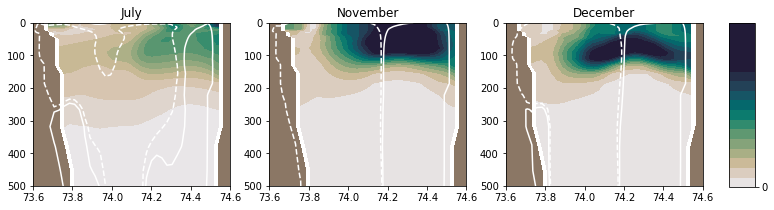

In [27]:
fig, ax = plt.subplots(1,3,figsize=(12,3))

for axes in ax:
    axes.invert_yaxis()
    axes.set_ylim([500, 0])
    axes.set_xlim([73.6, 74.6])
    axes.contourf(lat[1479+P1i,159+P1j], depth, land_mask[:,1479+P1i,159+P1j], \
                   vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)    
    
levels=[-0.05, 0.05]
    
ax[0].set_title('July')
ax[1].set_title('November')
ax[2].set_title('December')
ax[0].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[7,:,P1i,P1j]), 16, vmin=0, vmax=0.05, cmap=cmocean.cm.rain)
CS= ax[1].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[10,:,P1i,P1j]), 16, vmin=0, vmax=0.05, cmap=cmocean.cm.rain)
ax[2].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[11,:,P1i,P1j]), 16, vmin=0, vmax=0.05, cmap=cmocean.cm.rain)
ax[0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[6,:,:], levels, colors='w')
ax[1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[10,:,:], levels, colors='w')
ax[2].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[11,:,:], levels, colors='w')

cb1axes = fig.add_axes([0.93, 0.12, 0.03, 0.76]) 
cb = fig.colorbar(CS, ticks=[0, 0.5, 1, 1.5, 2], cax=cb1axes)
cb.set_clim(0, 0.05)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-XS-parry-gc.png', bbox_inches='tight', dpi=300)

#### cross section PC continental vs. glacial extent

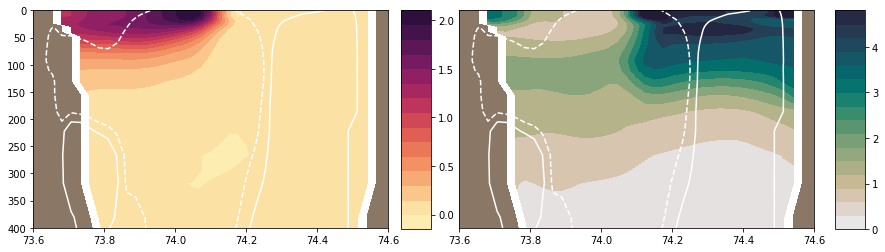

In [36]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

for axes in ax:
    axes.invert_yaxis()
    axes.set_ylim([400, 0])
    axes.set_xlim([73.6, 74.6])
    axes.contourf(lat[1479+P1i,159+P1j], depth, land_mask[:,1479+P1i,159+P1j], \
                   vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)    
        

ax[1].get_yaxis().set_ticks([])        

levels=[-0.05, 0.05]

# ax[0].set_title('Continental')
# ax[1].set_title('Glacial')

CS1 = ax[0].contourf(tlats[P1i,P1j], depth, np.transpose(cont_prop_2015[8,:,P1i,P1j])*100, 16, vmin=0, vmax=2, cmap=cmocean.cm.matter)
CS2 = ax[1].contourf(tlats[P1i,P1j], depth, np.transpose(glacier_prop_2015[8,:,P1i,P1j])*100, 16, vmin=0, vmax=3, cmap=cmocean.cm.rain)
ax[0].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[8,:,:], levels, colors='w')
ax[1].contour(tlats[P1i,P1j[0:-1]], depth, V11_2015[8,:,:], levels, colors='w')

cb1axes = fig.add_axes([0.49, 0.12, 0.03, 0.76]) 
cb2axes = fig.add_axes([0.92, 0.12, 0.03, 0.76]) 
cb1 = fig.colorbar(CS1, ax=ax[0], cax=cb1axes, ticks=[0, 0.5, 1, 1.5, 2])
cb2 = fig.colorbar(CS2, ax=ax[1], cax=cb2axes, ticks=[0, 1, 2, 3, 4, 5])
cb1.set_clim(0, 2)
cb2.set_clim(0, 5)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-XS-parry-gc-cn.png', bbox_inches='tight', dpi=300)

# Top down look:

Average over the top meters

In [37]:
glac_prop = np.nanmean(glacier_prop_2015[:,0:10,:], axis=1)
cont_prop = np.nanmean(cont_prop_2015[:,0:10,:], axis=1)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


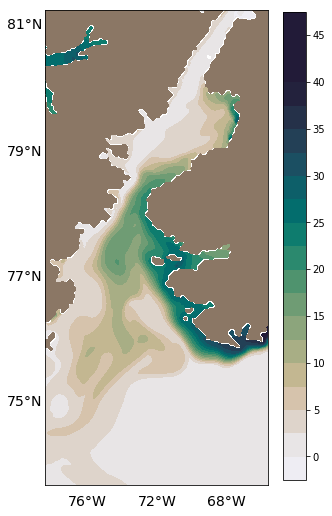

In [42]:
fig, ax1 = plt.subplots(figsize=(4,10))

proj2 = Basemap(projection='stere',lat_0 = 77.6, lon_0 = -72, resolution='i', width=0.4e6, height=0.85e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_land, y_land = proj2(lon, lat)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

#---------------------
x_model, y_model = proj2(lons, lats)
CS = proj2.contourf(x_model, y_model, glac_prop[8,:,:]*100, 20, vmin=0, vmax=40, cmap=cmocean.cm.rain)

cbaxes = fig.add_axes([0.95, 0.18, 0.08, 0.65]) 

CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, ticks=[0,5,10,15,20,25,30,35,40,45]) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-Nares-gc.png', bbox_inches='tight', dpi=300)

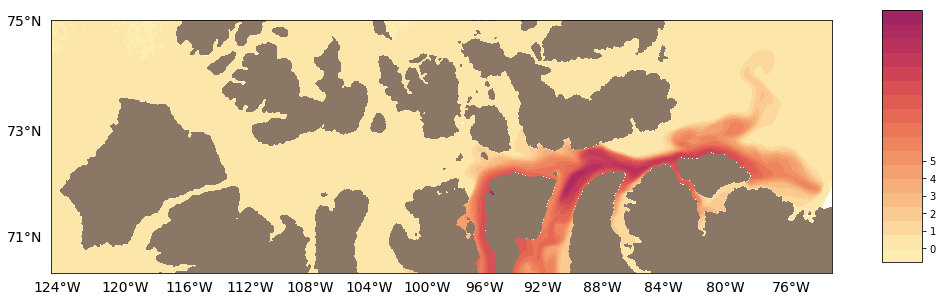

In [32]:
fig, ax1 = plt.subplots(figsize=(14,5))

proj2 = Basemap(projection='stere',lat_0 = 74.8, lon_0 = -99, resolution='i', width=1.85e6, height=0.60e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_land, y_land = proj2(lon, lat)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

#---------------------
x_model, y_model = proj2(lons, lats)
CS = proj2.contourf(x_model, y_model, cont_prop[8,:,:]*100, 20, vmin=0, vmax=20, cmap=cmocean.cm.matter)

# proj2.plot(x_model[r1i, r1j], y_model[r1i, r1j], '--k', linewidth=2.5)
# proj2.plot(x_model[P1i, P1j[3:-2]], y_model[P1i, P1j[3:-2]], '--k', linewidth=2.5)

cbaxes = fig.add_axes([0.95, 0.18, 0.04, 0.70]) 

CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, ticks=[0, 1.0, 2.0, 3.0, 4.0, 5.0]) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-Parry-cn.png', bbox_inches='tight', dpi=300)

North-Westward contribution from continental rivers from parry channel to queens channel, opposite the net along-channel velocity (from Hughes Water mass modification paper). Queens channel (nearby Resolute) is considered part of the eastern regime, i.e. dynamic + high buoyancy fluxes
- Identify observed flow direction in Queens Channel from literature
- Identify observed surface concentrations of nutrients in Queens Channel

Also view Hughes 2018, tidally modulated internal hydraulic flow (observational). identifies northward flow in wellington channel from PC and fluxes associated with tides "barotropic tidal fluxes". How come we identify the northward flow if we don't resolve tides? Northern end is Penny Strait, all southward flow in ANHA12.

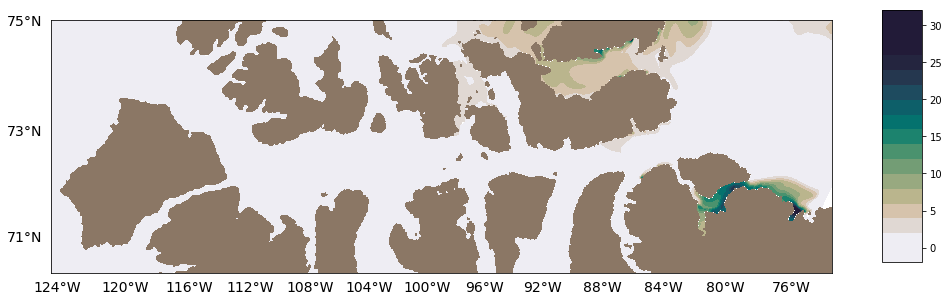

In [30]:
fig, ax1 = plt.subplots(figsize=(14,5))

proj2 = Basemap(projection='stere',lat_0 = 74.8, lon_0 = -99, resolution='i', width=1.85e6, height=0.60e6, ax=ax1)
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
proj2.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

x_land, y_land = proj2(lon, lat)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

#---------------------
x_model, y_model = proj2(lons, lats)
CS = proj2.contourf(x_model, y_model, glac_prop[8,:,:]*100, 20, vmin=1, vmax=26, cmap=cmocean.cm.rain)

# proj2.plot(x_model[r1i, r1j], y_model[r1i, r1j], '--k', linewidth=2.5)
# proj2.plot(x_model[P1i, P1j[3:-2]], y_model[P1i, P1j[3:-2]], '--k', linewidth=2.5)

cbaxes = fig.add_axes([0.95, 0.18, 0.04, 0.70]) 

CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, ticks=[0, 5, 10, 15, 20, 25, 30]) 
# a = CBar.set_label('Ocean depth [m]', fontsize=16)
# CBar.ax.tick_params(axis='y', length=0, labelsize=16)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/fig2-Parry-gc.png', bbox_inches='tight', dpi=300)